# The ROC curve and the AUC

## The data and models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
dat1 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=8)
dat2 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=9)
dat3 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=6) 

In [3]:
# The continuous predictions from the linear regression
lin_regr = LinearRegression(normalize=True)
lin_regr.fit(dat1[0], dat1[1])
output1 = lin_regr.predict(dat1[0])
lin_regr.fit(dat2[0], dat2[1])
output2 = lin_regr.predict(dat2[0])
lin_regr.fit(dat2[0], dat2[1])
output3 = lin_regr.predict(dat3[0])

actuals = [dat1[1],dat2[1],dat3[1]]
predicted = [output1,output2,output3]

# The discrete predictions from the logistic regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(dat1[0],dat1[1])
outputD1 = log_reg.predict(dat1[0])
log_reg.fit(dat2[0],dat2[1])
outputD2 = log_reg.predict(dat2[0])
log_reg.fit(dat3[0],dat3[1])
outputD3 = log_reg.predict(dat3[0])
data = [outputD1,outputD2,outputD3]

# The metrics

We might find it interesting to use the methods from earlier as well:

In [4]:
def calculate_accuracy(TP,FP,FN,TN):
    return (TP+TN)/(TP+FP+FN+TN)

def calculate_recall(TP,FP,FN,TN):
    return (TP)/(TP+FN)

def calculate_specificity(TP,FP,FN,TN):
    return (TN)/(TN+FP)

def calculate_precision(TP,FP,FN,TN):
    return (TP)/(TP+FP)

def calculate_fallout(TP,FP,FN,TN):
    return (FP)/(FP+TN)

def calculate_fscore(TP,FP,FN,TN):
    return 2/((1/calculate_recall(TP,FP,FN,TN))+(1/calculate_precision(TP,FP,FN,TN)))

def calculate_cm(predicted, actual):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(0,len(predicted)):
        if predicted[i] == 1:
            if predicted[i] == actual[i]:
                TP+=1
            else:
                FP+=1
        else:
            if predicted[i] == actual[i]:
                TN+=1
            else:
                FN+=1
    return TP,FP,FN,TN 

# Creating the thresholds

In [5]:
thresholds = set(predicted[0])
thresholds = list(thresholds)

# Creating the ROC curve

Now let's write a function for calculating the confusion matrix at a certain threshold:

In [6]:
def calculate_at_threshold(threshold, actual, predicted):
    x_coord = 0
    y_coord = 0
    
    
    # Keep track of the new prediction based on the given threshold in a new list
    new_pred = []
    for i in predicted:
        # If a prediction is above a certain threshold, store as positive prediction
        if i >= threshold:
            new_pred.append(1)
        else:
            new_pred.append(0)
    
    # Next, calculate the confusion matrix
    TP, FP, FN, TN = calculate_cm(new_pred, actual)
    
    # Use the confusion matrix to calculate the fallout (x-axis) and recall (y-axis)
    x_coord = calculate_fallout(TP,FP,FN,TN) 
    y_coord = calculate_recall(TP,FP,FN,TN)
    
    
    return x_coord, y_coord 

# Putting it all together

Now, let's bring it all together for three datasets:

Dataset 0
	T	F
T	37	18
F	14	31
Accuracy 0.68
Recall 0.7254901960784313
Precision 0.6727272727272727
Specificity 0.6326530612244898
Fall-out 0.3673469387755102
F1-score 0.6981132075471698


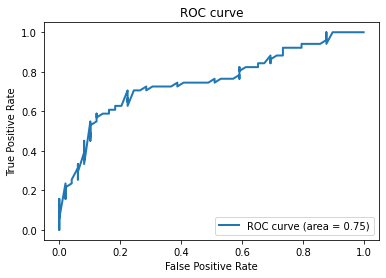

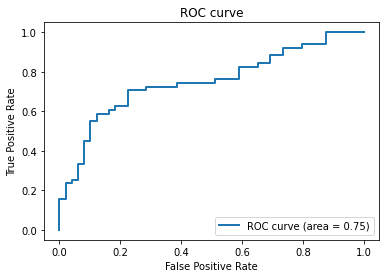

Dataset 1
	T	F
T	42	6
F	8	44
Accuracy 0.86
Recall 0.84
Precision 0.875
Specificity 0.88
Fall-out 0.12
F1-score 0.8571428571428572


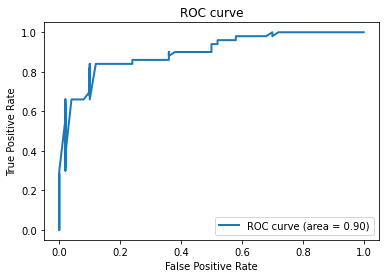

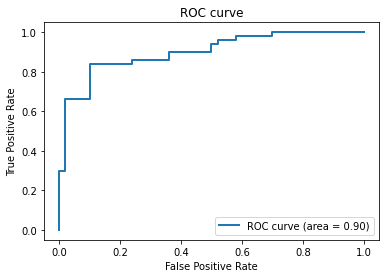

Dataset 2
	T	F
T	45	5
F	4	46
Accuracy 0.91
Recall 0.9183673469387755
Precision 0.9
Specificity 0.9019607843137255
Fall-out 0.09803921568627451
F1-score 0.9090909090909091


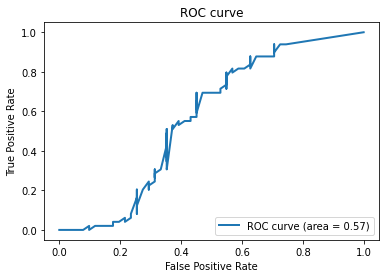

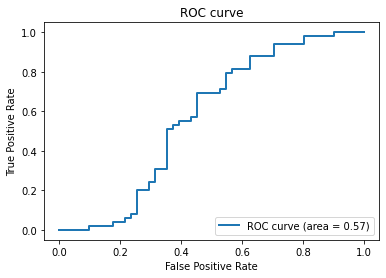

In [35]:
for i in range(0,3):
    
    # Let's calculate the standard metrics for the logistic regression output
    print('Dataset '+str(i))
    TP,FP,FN,TN = calculate_cm(data[i], actuals[i])
    print('\tT\tF')
    print('T\t'+str(TP)+'\t'+str(FP))
    print('F\t'+str(FN)+'\t'+str(TN))
        
    print('Accuracy '+str(calculate_accuracy(TP,FP,FN,TN)))
    print('Recall '+str(calculate_recall(TP,FP,FN,TN)))
    print('Precision '+str(calculate_precision(TP,FP,FN,TN)))
    print('Specificity '+str(calculate_specificity(TP,FP,FN,TN)))
    print('Fall-out '+str(calculate_fallout(TP,FP,FN,TN)))
    print('F1-score '+str(calculate_fscore(TP,FP,FN,TN)))
    
    # Same as before
    thresholds = set(predicted[i])
    thresholds = list(thresholds)
    
    # Find all the coordinates (false and true positive rate on the x and y axis respectively) and save them in fpr and tpr
    # For all thresholds
    fpr = []
    tpr = []
    for threshold in thresholds:   
        if threshold >= 0 and threshold<=1:
            fpr_t, tpr_t = calculate_at_threshold(threshold,actuals[i],predicted[i])
            fpr.append(fpr_t)
            tpr.append(tpr_t)
    fpr = np.asarray(fpr)
    tpr = np.asarray(tpr)
    
    # Make sure (0,0) and (1,1) are included
    fpr = np.append(fpr,0)
    tpr = np.append(tpr,0)
    fpr = np.append(fpr,1)
    tpr = np.append(tpr,1)
    
    # This function sorts all points in the false positive rate dimension
    desc_score_indices = np.argsort(fpr)[::-1]
    fpr = fpr[desc_score_indices]
    tpr = tpr[desc_score_indices]
    
    # This function calculates the area under curve
    roc_auc = auc(fpr,tpr) 
    
    # Create the graph 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.plot(fpr, tpr,
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()    
    
    # Or do it the easy way and calculate it with the roc() function
    fpr, tpr, thresholds = roc(actuals[i],predicted[i])
    roc_auc = auc(fpr,tpr)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr,
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

TPR 1, FPR 1 means that you predict all as positive.
TPR 0, FPR 0 means that you predict all as negative.
Diagonal means you predict as positive arbitrary along with the probability p=TPR=FPR.
eg. Suppose u r predicting as positive arbitrary along with the probability 1/3.
In case its real value is positive 1/3 is correct, TPR is 1/3.
In case its real value is negative 1/3 is wrong, FPR is 1/3.

The ROC curve and the AUC are especially useful when we look at skewed distributions because they do not change, when the class distribution is not balanced, since the ROC curve uses both the true positive and false positive rates at the same time.

AUC = Area under curve.
The closer the AUC value of 1, The better the classification, and the closer the 0.5, the worse the classification.